In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
df = pd.read_csv("data/CICIDS2017_sample_km.csv")

In [3]:
train, val = train, val = train_test_split(df, test_size=0.20, random_state=11)

x_train = train.drop(columns=['Label'])
y_train = train['Label'].values

x_val = val.drop(columns=['Label'])
y_val = val['Label'].values

In [4]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [5]:
x_train.shape

(21440, 77)

In [6]:
x_val.shape

(5360, 77)

In [7]:
xgb.score(x_train, y_train)

0.9995335820895522

In [8]:
xgb.score(x_val, y_val)

0.9977611940298508

In [9]:
xgb.feature_importances_

array([6.7416206e-03, 3.4533590e-02, 7.9903724e-03, 5.5706132e-02,
       8.7913172e-03, 2.2711486e-03, 4.6240129e-03, 9.1262842e-03,
       2.2445892e-03, 2.5096014e-02, 5.2663744e-03, 2.6545050e-02,
       1.8531708e-01, 0.0000000e+00, 0.0000000e+00, 2.9783633e-03,
       3.2739103e-02, 1.7998647e-03, 1.0931267e-03, 2.6802155e-03,
       2.0711198e-03, 2.3354825e-03, 1.7923260e-03, 6.3508721e-03,
       1.3814762e-03, 4.4943774e-03, 1.9307578e-03, 2.2666235e-03,
       4.5064937e-02, 1.9115051e-02, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.3367988e-01, 4.9130437e-03, 6.8396050e-04,
       2.3675844e-02, 3.1445923e-03, 1.7131895e-02, 1.0945538e-02,
       6.8280059e-03, 0.0000000e+00, 8.9913653e-03, 0.0000000e+00,
       0.0000000e+00, 1.1265091e-01, 4.2038417e-05, 3.2268208e-02,
       0.0000000e+00, 0.0000000e+00, 2.4604583e-03, 4.7626555e-02,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

<BarContainer object of 77 artists>

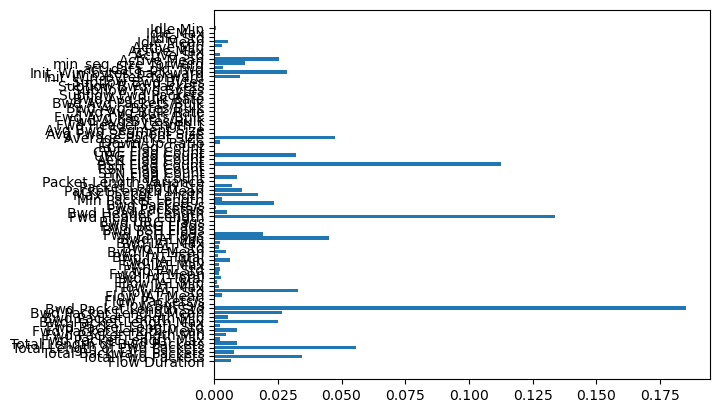

In [10]:
plt.barh(x_train.columns, xgb.feature_importances_)

Text(0.5, 0, 'Xgboost Feature Importance')

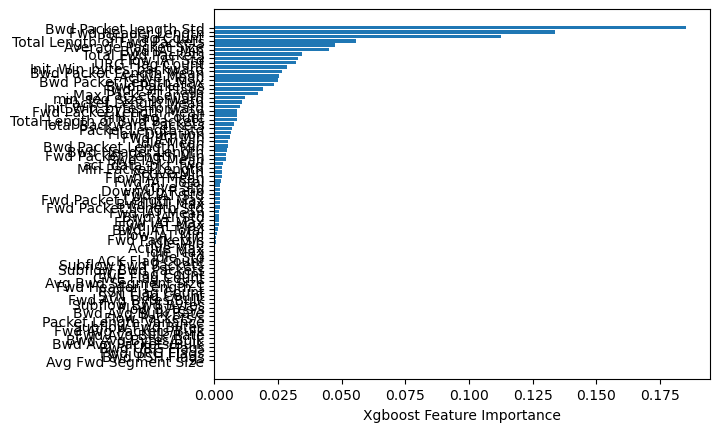

In [11]:
sorted_idx = xgb.feature_importances_.argsort()
plt.barh(x_train.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [12]:
feature_importances = pd.DataFrame(xgb.feature_importances_, 
                                   index = x_train.columns,  
                                   columns= ['importance']).sort_values('importance', ascending=False)

In [13]:
feature_importances

,importance
Bwd Packet Length Std,0.185317
Fwd Header Length,0.133680
PSH Flag Count,0.112651
Total Length of Fwd Packets,0.055706
Average Packet Size,0.047627
...,...
Fwd Avg Bytes/Bulk,0.000000
Fwd Header Length.1,0.000000
Avg Bwd Segment Size,0.000000
Avg Fwd Segment Size,0.000000
